# 과적합 피하기 - 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv("sonar.csv", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [4]:
df[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

In [5]:
# X data: scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:, :-1].values)

In [6]:
# Y data: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2, random_state=seed
)

### 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) 은닉층 2개

In [9]:
model1 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                4880      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                972       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=0)

In [12]:
model1.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3353130845796494, 0.85714287]

In [13]:
params1, acc1 = 5865, 0.857

- Case 2) 은닉층 4개

In [14]:
model2 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                4880      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                3888      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                980       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=0)
model2.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5008991332281203, 0.8333333]

In [16]:
params2, acc2 = 9925, 0.8333

- Case 3) 은닉층 6개

In [18]:
model3 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                5184      
_________________________________________________________________
dense_17 (Dense)             (None, 40)                2600      
_________________________________________________________________
dense_18 (Dense)             (None, 24)                984       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [19]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=0)
model3.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4303584297498067, 0.9047619]

In [20]:
params3, acc3 = 13947, 0.905

In [22]:
model4 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(36, activation='relu'),
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                5184      
_________________________________________________________________
dense_33 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_34 (Dense)             (None, 36)                1764      
_________________________________________________________________
dense_35 (Dense)             (None, 28)                1036      
_________________________________________________________________
dense_36 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_37 (Dense)             (None, 10)               

In [23]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=0)
model4.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5182833103906541, 0.71428573]

In [24]:
params4, acc4 = 16667, 0.714

- 학습과정 시각화

In [26]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1)+1)

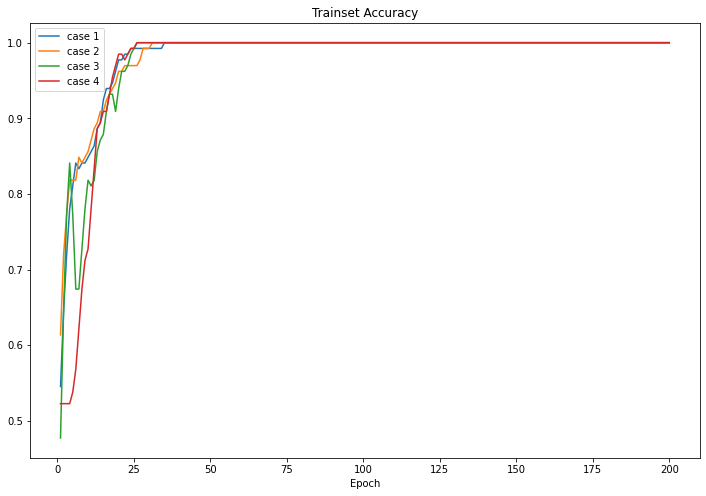

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc1, label='case 1')
plt.plot(xs, y_acc2, label='case 2')
plt.plot(xs, y_acc3, label='case 3')
plt.plot(xs, y_acc4, label='case 4')
plt.legend()
plt.xlabel('Epoch'), plt.title("Trainset Accuracy")
plt.show()

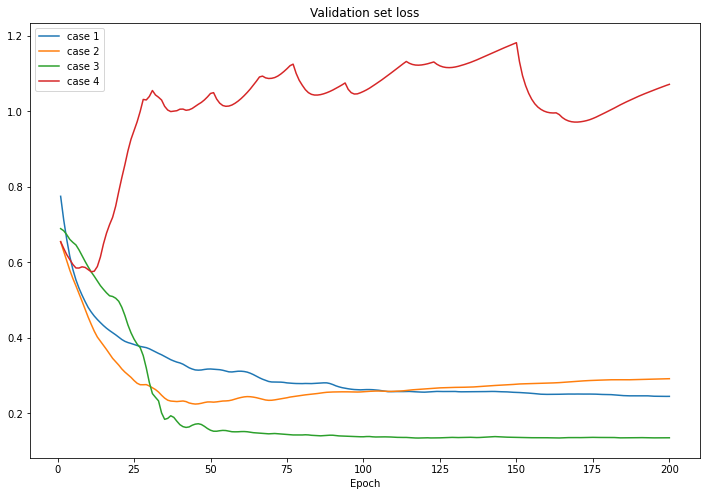

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_vloss1, label='case 1')
plt.plot(xs, y_vloss2, label='case 2')
plt.plot(xs, y_vloss3, label='case 3')
plt.plot(xs, y_vloss4, label='case 4')
plt.legend()
plt.xlabel('Epoch'), plt.title("Validation set loss")
plt.show()

### Case 2에 대해서 베스트 모델

In [40]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_46 (Dense)             (None, 48)                3888      
_________________________________________________________________
dense_47 (Dense)             (None, 20)                980       
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

- 베스트 모델만 저장하는 콜백 함수

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5py', monitor='val_loss', 
                                        verbose=1, save_best_only=True)

In [43]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=0,
                                callbacks=[mc])


Epoch 00001: val_loss improved from inf to 0.67253, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00002: val_loss improved from 0.67253 to 0.64858, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00003: val_loss improved from 0.64858 to 0.62186, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00004: val_loss improved from 0.62186 to 0.59332, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00005: val_loss improved from 0.59332 to 0.56285, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00006: val_loss improved from 0.56285 to 0.53719, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets

Epoch 00007: val_loss improved from 0.53719 to 0.51291, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to

In [44]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5py')
best_model.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.614770457858131, 0.88095236]

In [47]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

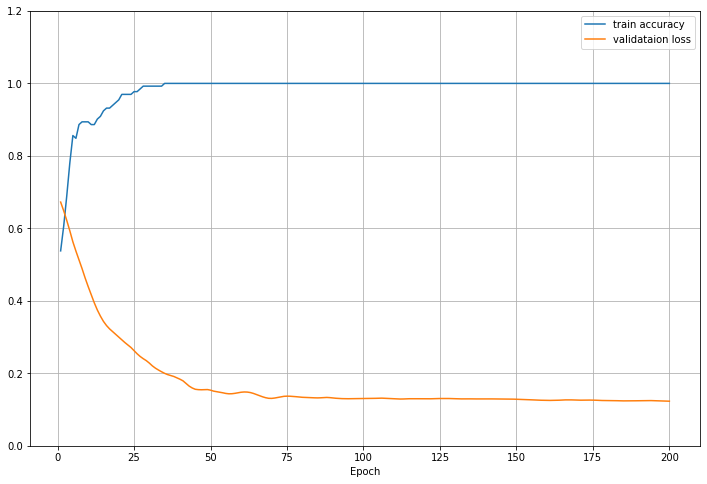

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.show()

- 조기 종료 콜백 함수

In [51]:
del model

In [52]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_51 (Dense)             (None, 48)                3888      
_________________________________________________________________
dense_52 (Dense)             (None, 20)                980       
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 9         
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5py', monitor='val_loss', 
                                        verbose=1, save_best_only=True)
es = EarlyStopping(patience=20)

In [55]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                                epochs=200, batch_size=100, verbose=1,
                                callbacks=[mc, es])

Train on 132 samples, validate on 34 samples
Epoch 1/200
100/132 [=====================>........] - ETA: 0s - loss: 0.7019 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 0.67011, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets
132/132 [==============================] - 2s 13ms/sample - loss: 0.7022 - accuracy: 0.5000 - val_loss: 0.6701 - val_accuracy: 0.6471
Epoch 2/200
100/132 [=====================>........] - ETA: 0s - loss: 0.6786 - accuracy: 0.5400
Epoch 00002: val_loss improved from 0.67011 to 0.65395, saving model to sonar_best.h5py
INFO:tensorflow:Assets written to: sonar_best.h5py\assets
132/132 [==============================] - 1s 8ms/sample - loss: 0.6705 - accuracy: 0.5606 - val_loss: 0.6539 - val_accuracy: 0.6765
Epoch 3/200
100/132 [=====================>........] - ETA: 0s - loss: 0.6521 - accuracy: 0.6500
Epoch 00003: val_loss improved from 0.65395 to 0.63632, saving model to sonar_best.h5py
INFO:tensorflow:Asset

In [56]:
best_model = load_model('sonar_best.h5py')
best_model.evaluate(X_test, y_test)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4759622812271118, 0.8095238]